In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [7]:
#import splitfolders

In [36]:
#input_folders= r"C:\Users\madhu\Desktop\Skin burn project\dataset"

In [37]:
#input_folders

'C:\\Users\\madhu\\Desktop\\Skin burn project\\dataset'

In [38]:
#splitfolders.ratio(input_folders,output='dataset1',seed=42,ratio=(.8,.1,.1), group_prefix=None)

Copying files: 1240 files [00:02, 464.81 files/s]


In [2]:
IMAGE_SIZE = 224
CHANNELS = 3

In [25]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\madhu\Desktop\Skin burn project\dataset1",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32
)

Found 1240 files belonging to 3 classes.


In [26]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1]


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        r'C:\Users\madhu\Desktop\Skin burn project\dataset1\train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 991 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Degree1': 0, 'Degree2': 1, 'Degree3': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Degree1', 'Degree2', 'Degree3']

In [28]:
for image_batch, labels_batch in .take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

SyntaxError: invalid syntax (3728772571.py, line 1)

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.89574975 0.5702595  0.53888696]
  [0.896443   0.57095283 0.5395802 ]
  [0.8971363  0.57164603 0.5402735 ]
  ...
  [0.1563281  0.36024967 0.5955438 ]
  [0.18032947 0.38425103 0.61954516]
  [0.20211938 0.40604094 0.64133507]]

 [[0.89019614 0.5647059  0.53333336]
  [0.89019614 0.5647059  0.53333336]
  [0.89019614 0.5647059  0.53333336]
  ...
  [0.15771462 0.3616362  0.5969303 ]
  [0.18275586 0.38667744 0.62197155]
  [0.20385252 0.40777412 0.64306825]]

 [[0.88462585 0.5580216  0.5244209 ]
  [0.886359   0.56010133 0.52719396]
  [0.88809216 0.5621811  0.52996695]
  ...
  [0.15910113 0.3630227  0.59831685]
  [0.18518226 0.38910383 0.62439793]
  [0.20558566 0.40950724 0.6448014 ]]

 ...

 [[0.16862746 0.2901961  0.5058824 ]
  [0.16906361 0.29063225 0.50631857]
  [0.17296983 0.29453847 0.51022476]
  ...
  [0.13235737 0.12409344 0.21331355]
  [0.13478376 0.1261732  0.2178197 ]
  [0.13721016 0.12825297 0.22232586]]

 [[0.16862746 0.2901961  0.5058824 ]
  [0.16941024 0.29097888 0.50666517]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        r'C:\Users\madhu\Desktop\Skin burn project\dataset1\val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 123 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        r'C:\Users\madhu\Desktop\Skin burn project\dataset1\test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 126 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.01960784 0.01960784 0.02745098]
  [0.01960784 0.01960784 0.02745098]
  [0.01960784 0.01960784 0.02745098]
  ...
  [0.131643   0.11595672 0.06889789]
  [0.1492895  0.13360323 0.0865444 ]
  [0.18133841 0.16565214 0.11859331]]

 [[0.01960784 0.01960784 0.02745098]
  [0.01960784 0.01960784 0.02745098]
  [0.01960784 0.01960784 0.02745098]
  ...
  [0.13112868 0.1154424  0.06838357]
  [0.15546125 0.13977498 0.09271614]
  [0.18288136 0.16719508 0.12013625]]

 [[0.01960784 0.01960784 0.02745098]
  [0.01960784 0.01960784 0.02745098]
  [0.01960784 0.01960784 0.02745098]
  ...
  [0.13061437 0.11492809 0.06786927]
  [0.16163298 0.14594671 0.09888788]
  [0.18442428 0.16873801 0.12167919]]

 ...

 [[0.29444933 0.22098875 0.11107427]
  [0.24833183 0.2033216  0.11867137]
  [0.18556885 0.16925503 0.13903254]
  ...
  [0.20209143 0.18640515 0.15111102]
  [0.20466298 0.1889767  0.15368259]
  [0.20723453 0.19154826 0.15625414]]

 [[0.28982052 0.21996012 0.11158857]
  [0.23907422 0.19817849 0.12072862]


In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    train_generator,
    #steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    #validation_steps=6,
    verbose=2,
    epochs=30,
)

Epoch 1/30
31/31 - 33s - loss: 1.0341 - accuracy: 0.4218 - val_loss: 1.0211 - val_accuracy: 0.4390 - 33s/epoch - 1s/step
Epoch 2/30
31/31 - 31s - loss: 0.9867 - accuracy: 0.4309 - val_loss: 0.9572 - val_accuracy: 0.4472 - 31s/epoch - 1s/step
Epoch 3/30
31/31 - 31s - loss: 0.9341 - accuracy: 0.4823 - val_loss: 0.9346 - val_accuracy: 0.4553 - 31s/epoch - 1s/step
Epoch 4/30
31/31 - 31s - loss: 0.9019 - accuracy: 0.5025 - val_loss: 0.9051 - val_accuracy: 0.5691 - 31s/epoch - 993ms/step
Epoch 5/30
31/31 - 32s - loss: 0.8802 - accuracy: 0.5277 - val_loss: 0.9325 - val_accuracy: 0.5528 - 32s/epoch - 1s/step
Epoch 6/30
31/31 - 33s - loss: 0.8360 - accuracy: 0.5923 - val_loss: 0.8823 - val_accuracy: 0.5854 - 33s/epoch - 1s/step
Epoch 7/30
31/31 - 32s - loss: 0.8434 - accuracy: 0.5832 - val_loss: 0.9041 - val_accuracy: 0.5366 - 32s/epoch - 1s/step
Epoch 8/30
31/31 - 33s - loss: 0.8213 - accuracy: 0.6024 - val_loss: 0.8516 - val_accuracy: 0.6016 - 33s/epoch - 1s/step
Epoch 9/30
31/31 - 33s - loss

In [14]:
scores = model.evaluate(test_generator)

4/4 [==============================] - 2s 586ms/step - loss: 0.9251 - accuracy: 0.6190


In [15]:
scores

[0.9250906109809875, 0.6190476417541504]

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.0341079235076904,
 0.9867124557495117,
 0.9340775609016418,
 0.9018927216529846,
 0.8802231550216675]

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

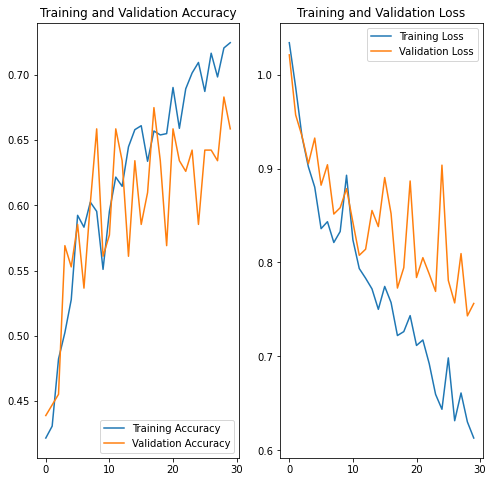

In [17]:
EPOCHS = 30

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [7]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

NameError: name 'test_generator' is not defined

<Figure size 1080x1080 with 0 Axes>